We will build a logistic regression model to predict whether a student gets admitted into a university.
We want to determine each applicant’s chance of admission based on their results on two exams. We have historical data from previous applicants that we can use as a training set for logistic regression. For each training example, we have the applicant’s scores on two exams and the admissions decision.
The task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

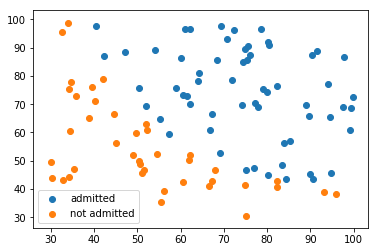

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ex2data1.txt', header=None)
df.columns = ["score1", "score2", "res"]
pos = df[(df.res == 1)] 
neg = df[(df.res == 0)]
plt.scatter(pos['score1'], pos['score2'], label='admitted')
plt.scatter(neg['score1'], neg['score2'], label='not admitted')
plt.legend()
plt.show()

In [2]:
#Data preparation
Xin = df.drop(['res'], axis=1).values
ones = np.ones((Xin.shape[0], 1), float)
X = np.concatenate((ones,Xin), axis=1)
y = df['res'].values

Now lets start with our **Logistic/Sigmoid Function**

In [3]:
def sigmoid(z):
    g = 1/(1 + np.exp(-z))
    return g

We will move ahead with our cost function

In [4]:
def costFunction(theta, X, y):
    m = X.shape[0]
    h = sigmoid(X.dot(theta))
    J =  -1 * (1/m) * (np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y))
    return J

In [5]:
def gradient(theta, X, y):
    m = X.shape[0]
    h = sigmoid(X.dot(theta))
    grad = (1/m) * (X.T.dot(h-y))
    return (grad.flatten())

In [6]:
theta = np.zeros(X.shape[1])
cost = costFunction(theta, X, y)
grad = gradient(theta, X, y)

print('cost ', cost)

cost  0.69314718056


In [7]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = X.shape[0]
    J_history = np.zeros(num_iters)
    for iter in np.arange(num_iters):
        theta = theta - alpha * gradient(theta, X, y)
        J_history[iter] = costFunction(theta, X, y)
    return (theta, J_history)

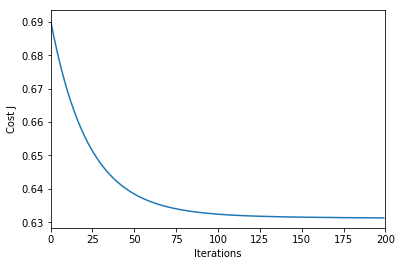

theta  [ -6.24091685e-05   6.04044518e-03   4.58187212e-03]


In [8]:
#now lots run the gradient descent

alpha = 0.00001;
num_iters = 200;
theta = np.zeros(X.shape[1])
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)


plt.xlim(0,num_iters)
plt.plot(J_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
plt.show()

print('theta ', theta)

In [9]:
testXs = np.array([[1, 56, 23], [1, 99, 89],[1, 52, 89],[1, 1, 99],[1, 82, 23],])
predictions = testXs.dot(theta)
print(predictions)

[ 0.44358558  1.00572828  0.72182736  0.45958338  0.60063715]


Lets try to achieve the same thing using **scipy.optimize** function

/Users/rohitarya/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


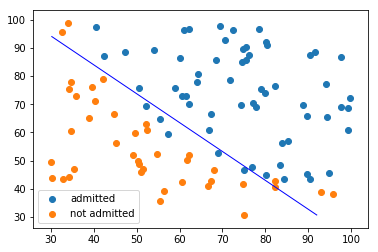

In [10]:
from scipy.optimize import minimize
initial_theta = np.zeros(X.shape[1])
res = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');
plt.scatter(pos['score1'], pos['score2'], label='admitted')
plt.scatter(neg['score1'], neg['score2'], label='not admitted')
plt.legend()
plt.show()